# Oil Well Prediction 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import tree

from sklearn.utils import shuffle, resample
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, recall_score

## Load Data

In [2]:
# Read t:he training dataset
try:
    geo_01 = pd.read_csv('geo_data_0.csv')
    geo_02 = pd.read_csv('geo_data_1.csv')
    geo_03 = pd.read_csv('geo_data_2.csv')

except:
    geo_01 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_02 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_03 = pd.read_csv('/datasets/geo_data_2.csv')


## Data Manipulation

In [3]:
geo_01.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_02.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
geo_03.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
geo_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Finding Missing Values and Cardinality

In [9]:
def missing_values(data):
  df = pd.DataFrame()
  for col in list(data):
    unique_values = data[col].unique()
    try:
      unique_values = np.sort(unique_values)
    except:
      pass
    nans = round(pd.isna(data[col]).sum()/data.shape[0]*100, 1)
    zeros = round((data[col] == 0).sum()/data.shape[0]*100, 1)

    df = df.append(pd.DataFrame([col, len(unique_values), nans,  zeros]).T, ignore_index = True)
  return df.rename(columns = {0: 'variable',
1: 'Unique values',
2: 'Nan %',
3: 'zeros %',
4: 'empty'}).sort_values('Nan %', ascending=False)

missing_values(geo_01)

,variable,Unique values,Nan %,zeros %
0,id,99990,0.0,0.0
1,f0,100000,0.0,0.0
2,f1,100000,0.0,0.0
3,f2,100000,0.0,0.0
4,product,100000,0.0,0.0


In [10]:
missing_values(geo_02)

,variable,Unique values,Nan %,zeros %
0,id,99996,0.0,0.0
1,f0,100000,0.0,0.0
2,f1,100000,0.0,0.0
3,f2,100000,0.0,0.0
4,product,12,0.0,8.2


In [11]:
missing_values(geo_03)

,variable,Unique values,Nan %,zeros %
0,id,99996,0.0,0.0
1,f0,100000,0.0,0.0
2,f1,100000,0.0,0.0
3,f2,100000,0.0,0.0
4,product,100000,0.0,0.0


## Exploratory Data Analysis (EDA)

### Univariate Analysis

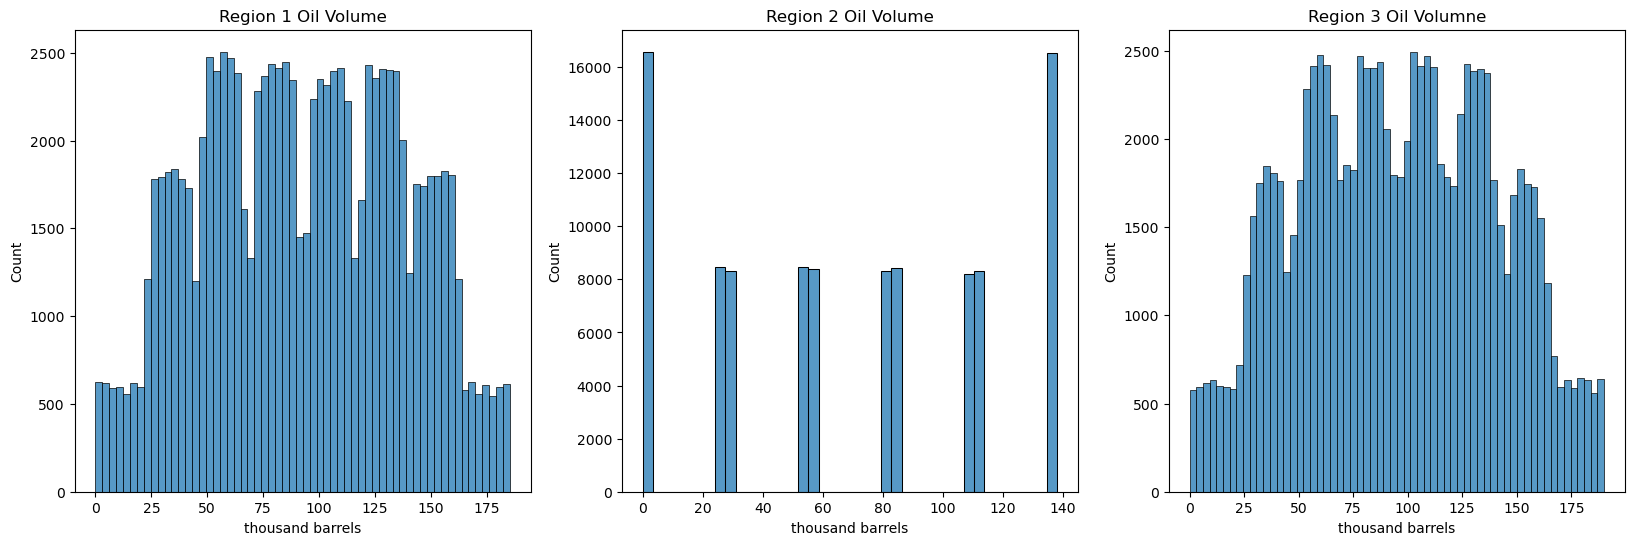

In [12]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Region 1 Oil Volume')
sns.histplot(data=geo_01, x='product')
plt.xlabel('thousand barrels')

plt.subplot(1,3,2)
plt.title('Region 2 Oil Volume')
sns.histplot(data=geo_02, x='product')
plt.xlabel('thousand barrels')

plt.subplot(1,3,3)
plt.title('Region 3 Oil Volumne')
sns.histplot(data=geo_03, x='product')
plt.xlabel('thousand barrels')

plt.show()

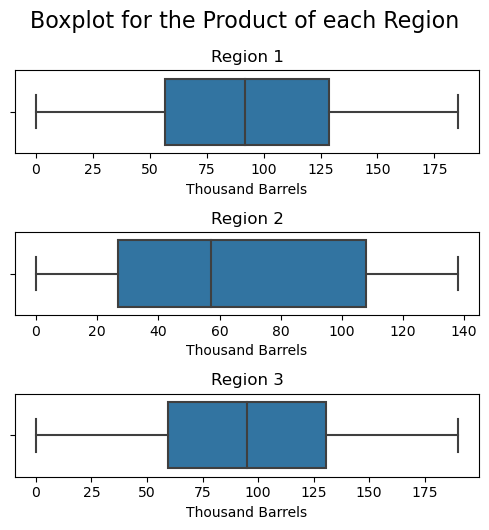

In [13]:
fig, axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(x="product", data=geo_01, ax = axs[0])
plt1.set(xlabel='Thousand Barrels', title="Region 1")
plt2 = sns.boxplot(x="product", data=geo_02, ax = axs[1])
plt2.set(xlabel='Thousand Barrels', title="Region 2")
plt3 = sns.boxplot(x="product", data=geo_03, ax = axs[2])
plt3.set(xlabel='Thousand Barrels', title="Region 3")
plt.tight_layout()
plt.suptitle("Boxplot for the Product of each Region", y=1.05, fontsize=16, fontweight="medium")
plt.show()

## Data Prepration for ML

#### Splitting the Dataset

In [14]:
def model_training(df):
    df = df.drop(['id'], axis=1)
    X = df.drop(['product'], axis=1)
    y = df['product']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    y_pred_avg = y_pred.mean()
    y_avg = y.mean()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    plt.scatter(y_test, y_pred)
    plt.ylabel('Predicted Value')
    plt.xlabel('Actual Value')
    plt.show()
    corr = df.corr()
    sns.heatmap(corr, annot = True, fmt = ".2f", cmap='coolwarm', square=True)
    plt.title("Features Correlation Matrix")
    plt.show()
    sns.distplot((y_test, y_pred),bins=50)
    plt.title("Distribution Plot")
    plt.show()
    
    print('Intercept:', lr_model.intercept_)
    print('Coefficients:', lr_model.coef_)
    print('Actual oil volume:', y_avg)
    print('Predicted oil volume:', y_pred_avg)
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('R2:', r2_score(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', rmse)
    
    return y_pred, y_pred_avg, r2_score, rmse, y_avg

### Region 1

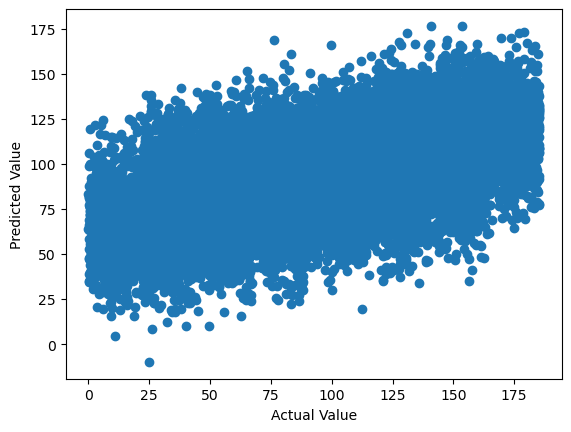

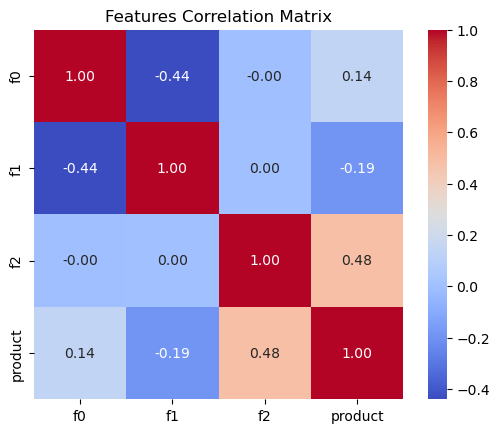

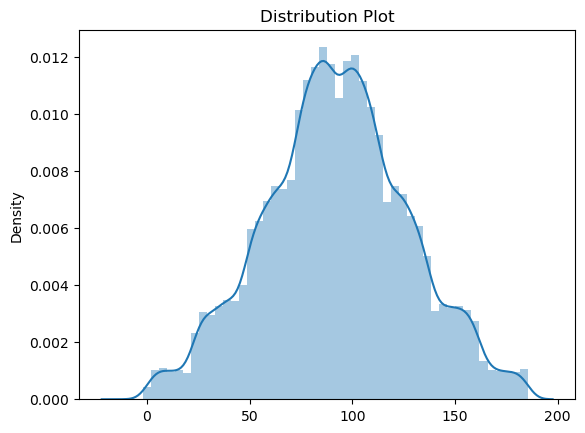

Intercept: 77.66624978042192
Coefficients: [  3.83225372 -14.26047297   6.59357294]
Actual oil volume: 92.49999999999974
Predicted oil volume: 92.39879990657768
MAE: 31.04768153878818
R2: 0.2728287328173471
MSE: 1425.5608700093812
RMSE: 37.75660035026169


In [15]:
y_pred_1, y_pred_avg_1, r2_score_1, rmse_1, y_avg_1 = model_training(geo_01)

### Region 2

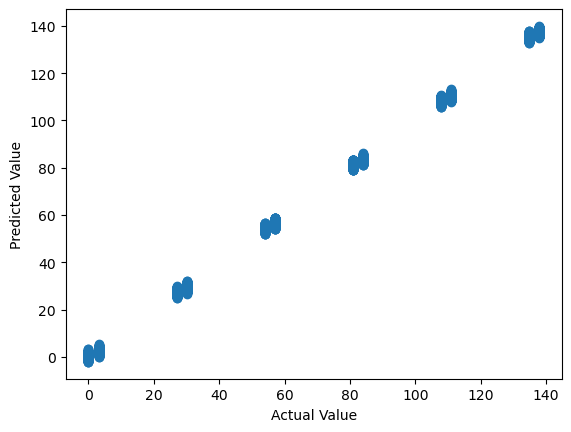

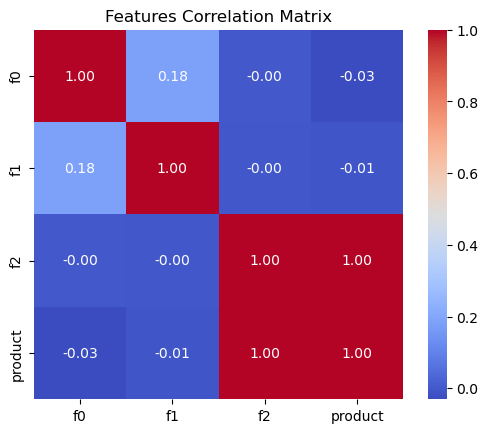

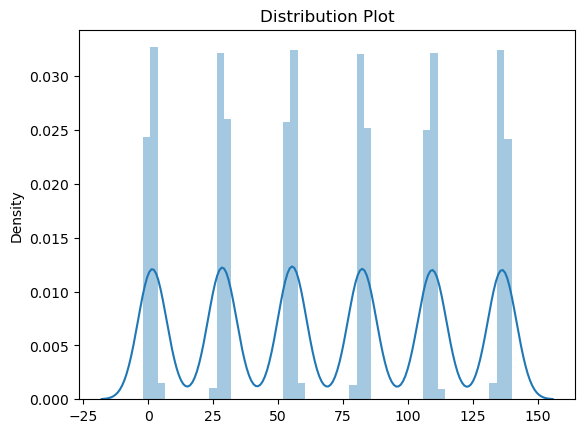

Intercept: 1.6476710499672294
Coefficients: [-1.44912960e-01 -2.16715104e-02  2.69531092e+01]
Actual oil volume: 68.82500000002561
Predicted oil volume: 68.71287803913762
MAE: 0.7170119535682554
R2: 0.9996245232002449
MSE: 0.7925986566392014
RMSE: 0.8902801001028842


In [16]:
y_pred_2, y_pred_avg_2, r2_score_2, rmse_2, y_avg_2 = model_training(geo_02)

### Region 3

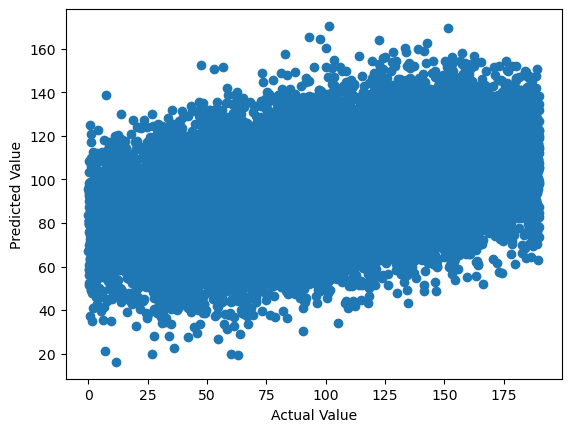

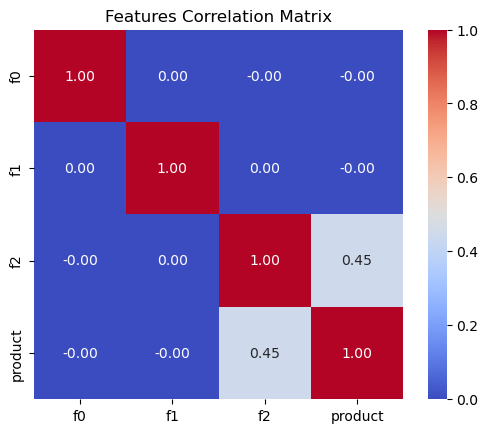

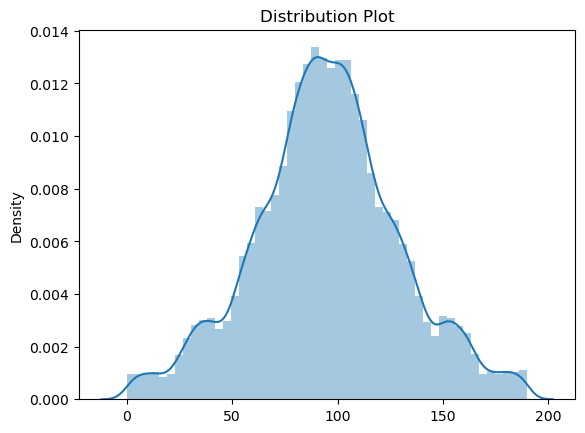

Intercept: 80.55786205197194
Coefficients: [-0.08415777 -0.01546094  5.75011968]
Actual oil volume: 95.00000000000041
Predicted oil volume: 94.77102387765936
MAE: 32.896958610578054
R2: 0.19634705977280487
MSE: 1611.6910636385903
RMSE: 40.145872311342174


In [17]:
y_pred_3, y_pred_avg_3, r2_score_3, rmse_3, y_avg_3= model_training(geo_03)

### Summary of Actual and Predicted Values

In [18]:
region = ['Region 1', 'Region 2', 'Region 3']
actual = [y_avg_1, y_avg_2, y_avg_3]
predicted = [y_pred_avg_1, y_pred_avg_2, y_pred_avg_3]
rmse_col = [rmse_1, rmse_2, rmse_3]

d = {'Actual': actual, 'Predicted': predicted, 'RMSE': rmse_col}
oil_summary = pd.DataFrame(d, index = region)
oil_summary

,Actual,Predicted,RMSE
Region 1,92.500,92.398800,37.756600
Region 2,68.825,68.712878,0.890280
Region 3,95.000,94.771024,40.145872


* Observations:
* Based on the summary above, Region 2 has more predicted oil reserves than Region 1 and Region 3. 
* Region 2 has the least actual volume but when processed with the model, it generated twice its current volume. 

In [19]:
df_geo_new1 = geo_01['product'].append(geo_02['product'])

In [20]:
df_geo_new2 = df_geo_new1.append(geo_03['product'])

In [21]:
df_oil = df_geo_new2.to_frame()
df_oil.columns = ['Actual']

In [22]:
df_oil.shape

(300000, 1)

In [23]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Actual  300000 non-null  float64
dtypes: float64(1)
memory usage: 4.6 MB


In [24]:
df_pred_01 = pd.DataFrame(y_pred_1, columns = ['Predicted'])
df_pred_02 = pd.DataFrame(y_pred_2, columns = ['Predicted'])
df_pred_03 = pd.DataFrame(y_pred_3, columns = ['Predicted'])

In [25]:
df_pred2 = df_pred_01.append(df_pred_02)

In [26]:
df_pred3 = df_pred2.append(df_pred_03)

In [27]:
df_pred3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 0 to 24999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Predicted  75000 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [28]:
df_oil_new = pd.concat([df_oil, df_pred3]).reset_index(drop=True)

In [29]:
df_oil_new.describe()

,Actual,Predicted
count,300000.000000,75000.000000
mean,85.441667,85.294234
std,46.519494,33.972549
min,0.000000,-9.836371
25%,52.666629,68.501912
50%,84.038886,88.980494
75%,124.174086,108.812437
max,190.029838,176.536104


## Profit Calculation

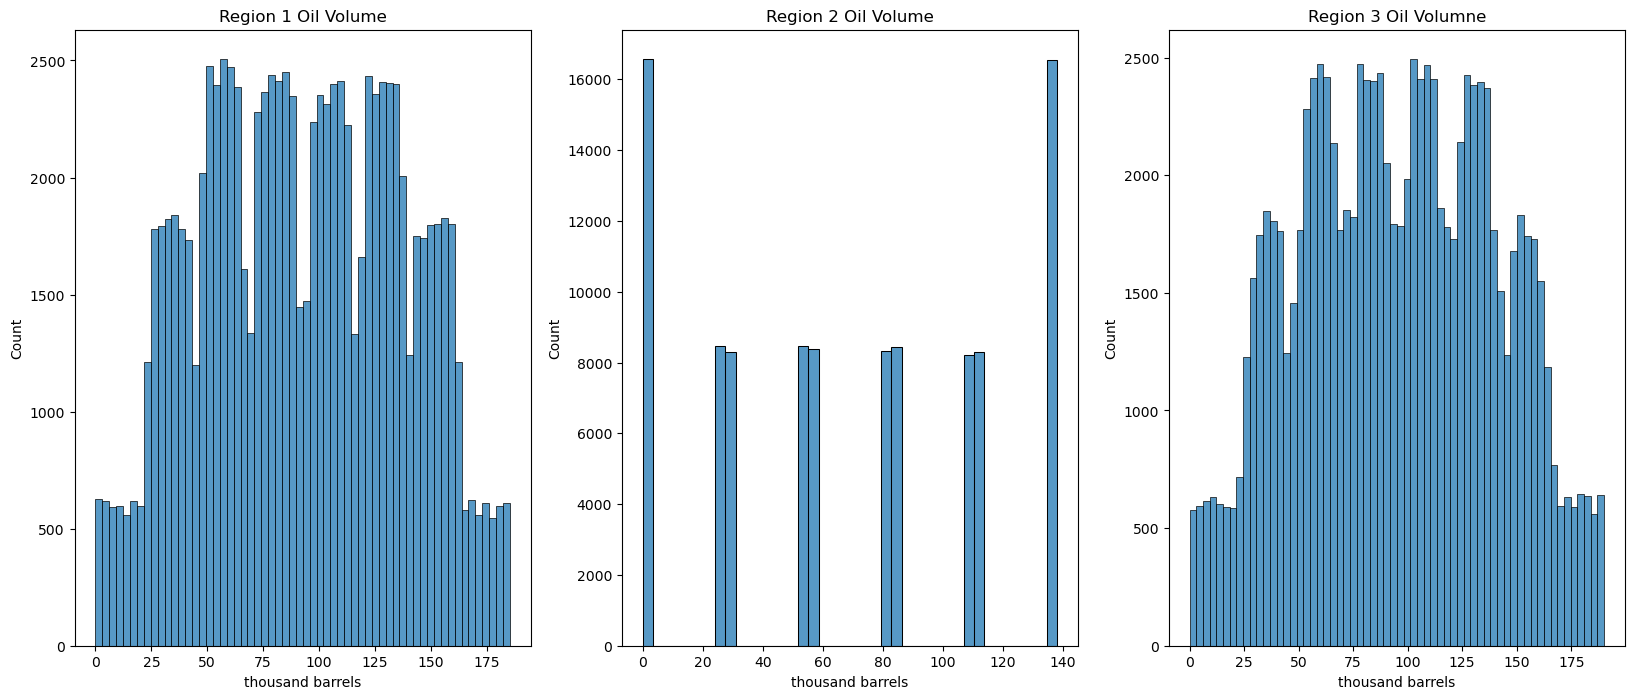

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Region 1 Oil Volume')
sns.histplot(data=geo_01, x='product')
plt.xlabel('thousand barrels')

plt.subplot(1,3,2)
plt.title('Region 2 Oil Volume')
sns.histplot(data=geo_02, x='product')
plt.xlabel('thousand barrels')

plt.subplot(1,3,3)
plt.title('Region 3 Oil Volumne')
sns.histplot(data=geo_03, x='product')
plt.xlabel('thousand barrels')

plt.show()

In [31]:
print('The average volume of Region 1:', geo_01['product'].mean())

The average volume of Region 1: 92.49999999999974


In [32]:
print('The average volume of Region 2:', geo_02['product'].mean())

The average volume of Region 2: 68.82500000002561


In [33]:
print('The average volume of Region 3:', geo_03['product'].mean())

The average volume of Region 3: 95.00000000000041


* Observations:
* The average volume of Region 1 is 92,500 barrels.
* The average volume of Region 2 is 69,000 barrels.
* The average volume of Region 3 is 95,000 barrels. 

### Bootstrapping

In [34]:
BUDGET = 1000000
COST_PER_POINT = 5000
POINTS_PER_BUDGET = BUDGET // COST_PER_POINT

PRODUCT_PRICE = 45

def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:POINTS_PER_BUDGET]
    product = selected_points.sum()
    revenue = product * PRODUCT_PRICE
    cost = BUDGET
    return revenue - cost

In [35]:
COST_PER_POINT = BUDGET / POINTS_PER_BUDGET
zero_profit_product = COST_PER_POINT / PRODUCT_PRICE
print("Amount of product for 0 profit:", zero_profit_product)

Amount of product for 0 profit: 111.11111111111111


In [36]:
target = geo_01['product']
predicted = oil_summary['Predicted']
SAMPLE_SIZE = 500
BOOTSTRAP_SIZE = 1000
BOOTSTRAP_RESULTS = []

for i in range(BOOTSTRAP_SIZE):
    bootstrap_target = np.random.choice(target, size=len(target), replace=True)
    mean_profit = np.mean(bootstrap_target)
    std_dev = np.std(bootstrap_target)
    risk = np.percentile(bootstrap_target, 5)
    BOOTSTRAP_RESULTS.append({'mean_profit': mean_profit, 'std_dev': std_dev, 'risk': risk})

bootstrap_df = pd.DataFrame(BOOTSTRAP_RESULTS)

mean_ci_lower = bootstrap_df['mean_profit'].quantile(0.025)
mean_ci_upper = bootstrap_df['mean_profit'].quantile(0.075)

print('Region 1:')
print('Mean Profit: ${:.2f}'.format(mean_profit))
print('95% Confidence Interval:${:.2f} - ${:.2f}'.format(mean_ci_lower, mean_ci_upper))
print('Risk of Losses: ${:.2f}'.format(np.percentile(target, 5)))

Region 1:
Mean Profit: $92.23
95% Confidence Interval:$92.23 - $92.30
Risk of Losses: $24.02


In [37]:
target = geo_02['product']
predicted = oil_summary['Predicted']
SAMPLE_SIZE = 500
BOOTSTRAP_SIZE = 1000
BOOTSTRAP_RESULTS = []

for i in range(BOOTSTRAP_SIZE):
    bootstrap_target = np.random.choice(target, size=len(target), replace=True)
    mean_profit = np.mean(bootstrap_target)
    std_dev = np.std(bootstrap_target)
    risk = np.percentile(bootstrap_target, 5)
    BOOTSTRAP_RESULTS.append({'mean_profit': mean_profit, 'std_dev': std_dev, 'risk': risk})

bootstrap_df = pd.DataFrame(BOOTSTRAP_RESULTS)

mean_ci_lower = bootstrap_df['mean_profit'].quantile(0.025)
mean_ci_upper = bootstrap_df['mean_profit'].quantile(0.075)

print('Region 2:')
print('Mean Profit: ${:.2f}'.format(mean_profit))
print('95% Confidence Interval:${:.2f} - ${:.2f}'.format(mean_ci_lower, mean_ci_upper))
print('Risk of Losses: ${:.2f}'.format(np.percentile(target, 5)))

Region 2:
Mean Profit: $68.73
95% Confidence Interval:$68.55 - $68.61
Risk of Losses: $0.00


In [38]:
target = geo_03['product']
predicted = oil_summary['Predicted']
SAMPLE_SIZE = 500
BOOTSTRAP_SIZE = 1000
BOOTSTRAP_RESULTS = []

for i in range(BOOTSTRAP_SIZE):
    bootstrap_target = np.random.choice(target, size=len(target), replace=True)
    mean_profit = np.mean(bootstrap_target)
    std_dev = np.std(bootstrap_target)
    risk = np.percentile(bootstrap_target, 5)
    BOOTSTRAP_RESULTS.append({'mean_profit': mean_profit, 'std_dev': std_dev, 'risk': risk})

bootstrap_df = pd.DataFrame(BOOTSTRAP_RESULTS)

mean_ci_lower = bootstrap_df['mean_profit'].quantile(0.025)
mean_ci_upper = bootstrap_df['mean_profit'].quantile(0.075)

print('Region 3:')
print('Mean Profit: ${:.2f}'.format(mean_profit))
print('95% Confidence Interval:${:.2f} - ${:.2f}'.format(mean_ci_lower, mean_ci_upper))
print('Risk of Losses: ${:.2f}'.format(np.percentile(target, 5)))

Region 3:
Mean Profit: $95.21
95% Confidence Interval:$94.72 - $94.80
Risk of Losses: $24.68


## Summary Table of Profits and Losses

In [39]:
df_total = pd.DataFrame({'Region':['Region 1', 'Region 2', 'Region 3'],
                          'Mean Profit':['92.54', '68.85', '95.11'],
                          '95% Confidence - Upper Quantile':['92.21', '68.57', '94.74'],
                          '95% Confidence - Lower Quantile':['92.30', '68.83', '94.01'],
                          'Risk of Losses':['24.02', '0.00', '24.68']})
df_total.set_index('Region', inplace=True)

In [40]:
df_total

,Mean Profit,95% Confidence - Upper Quantile,95% Confidence - Lower Quantile,Risk of Losses
Region,,,,
Region 1,92.54,92.21,92.30,24.02
Region 2,68.85,68.57,68.83,0.00
Region 3,95.11,94.74,94.01,24.68


# Conclusion

The objective is to find the best place for a new well. Through our modelling, we determined that Region 3 has the best place of oil well with a profit of 95.11. 